# Cumulative Distribution using DNNI
Author - Dibyajyoti Chakraborty

In [5]:
import torch                               
import DNNI
import matplotlib.pyplot as plt           # plotting
import numpy as np
import time
from tqdm import tqdm
torch.set_default_tensor_type(torch.DoubleTensor)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
if device == 'cuda': 
    print(torch.cuda.get_device_name()) 

cuda


In [2]:
def f1(x):
    f = 1/np.sqrt(2*np.pi)*torch.exp(-torch.square(x)/2)
    return f

Text(0.5, 0, 'x')

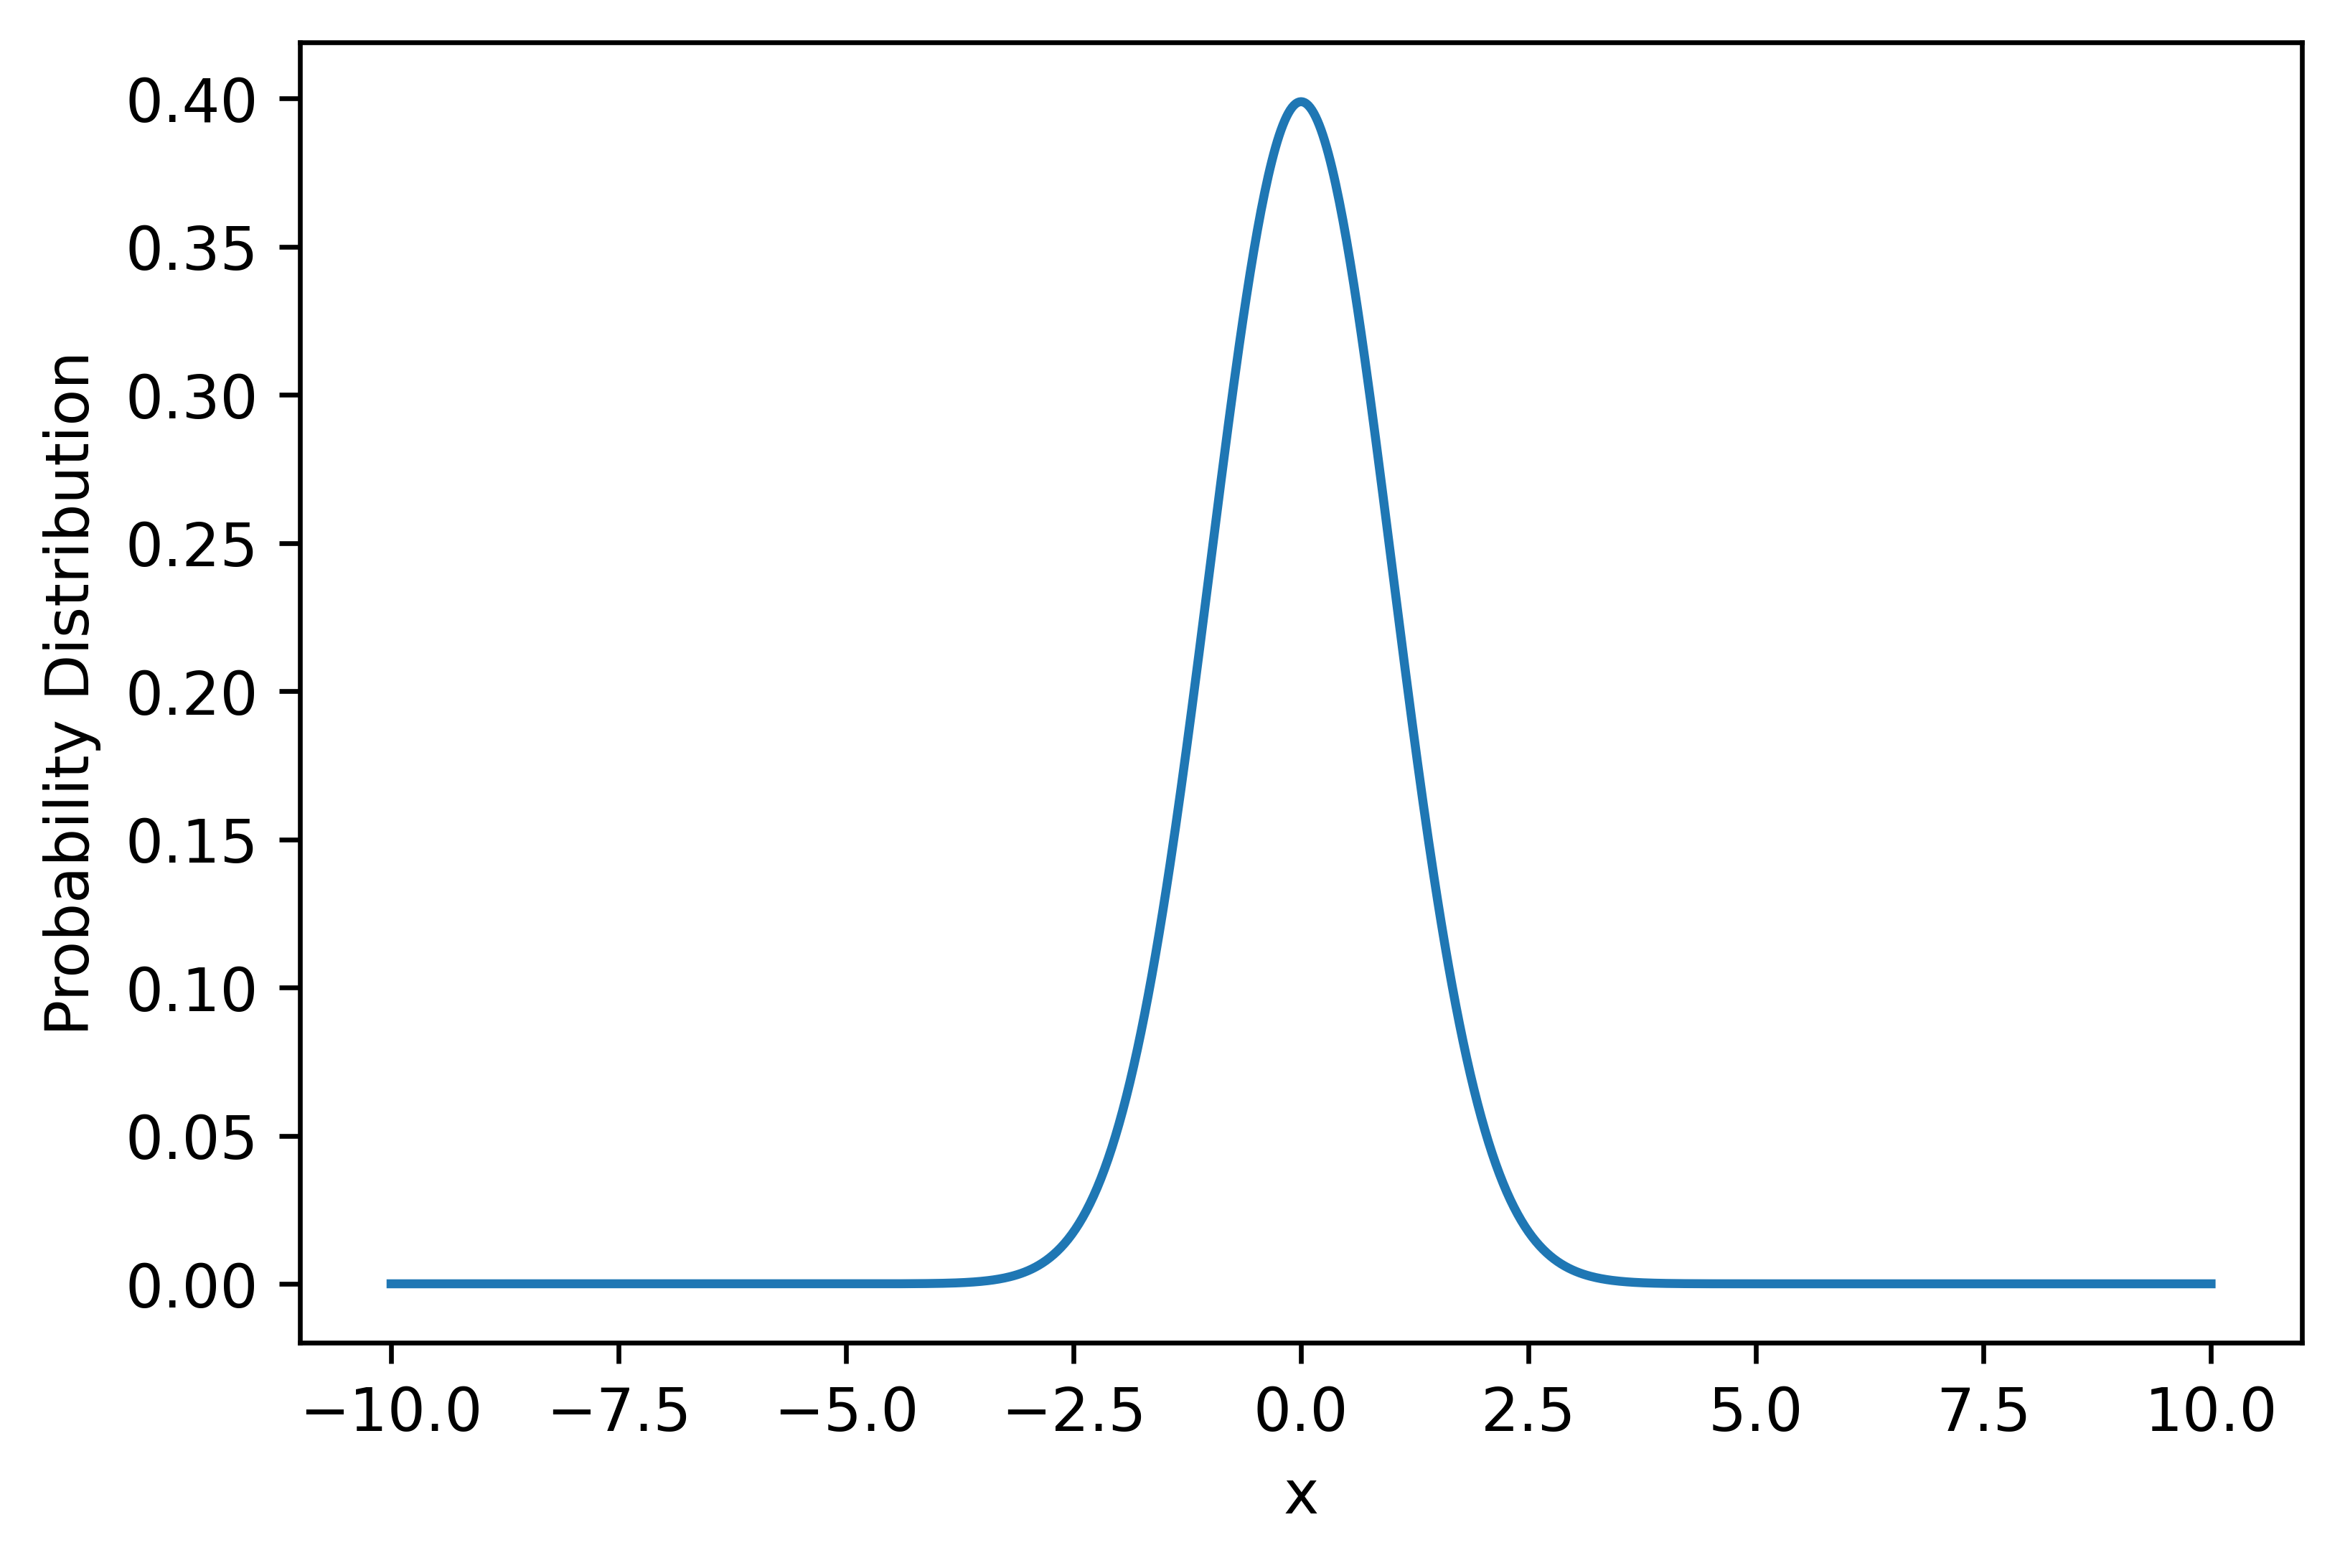

In [4]:
test_x1 = torch.linspace(-10,10,1001).view(-1,1)
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(test_x1,f1(test_x1))
plt.ylabel('Probability Distribution')
plt.xlabel('x')
#plt.savefig('images/normal.png',bbox_inches='tight')

In [7]:
steps=10000
x = torch.linspace(-5,5,1000).view(-1,1)
layers = np.array([1,10,10,10,1])
inn = DNNI.DNNI(layers,device)
inn.to(device)
inn.closure(steps=steps,x_train=x,int_f=f1,show=True)

  0%|▌                                                                                                                                                                  | 32/10000 [00:00<01:04, 154.47it/s]

Iter:  0 Loss:  0.005888805427346458  lr:  0.01


 26%|█████████████████████████████████████████                                                                                                                        | 2550/10000 [00:08<00:24, 305.55it/s]

Iter:  2500 Loss:  2.1399545180109025e-07  lr:  0.002


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 4702/10000 [00:15<00:17, 309.05it/s]

MSE :  9.996855883692029e-09


In [8]:
test_y1 = inn(x).detach().cpu().numpy()
test_y1[-1]-test_y1[0] #ans = 1

array([0.99999761])

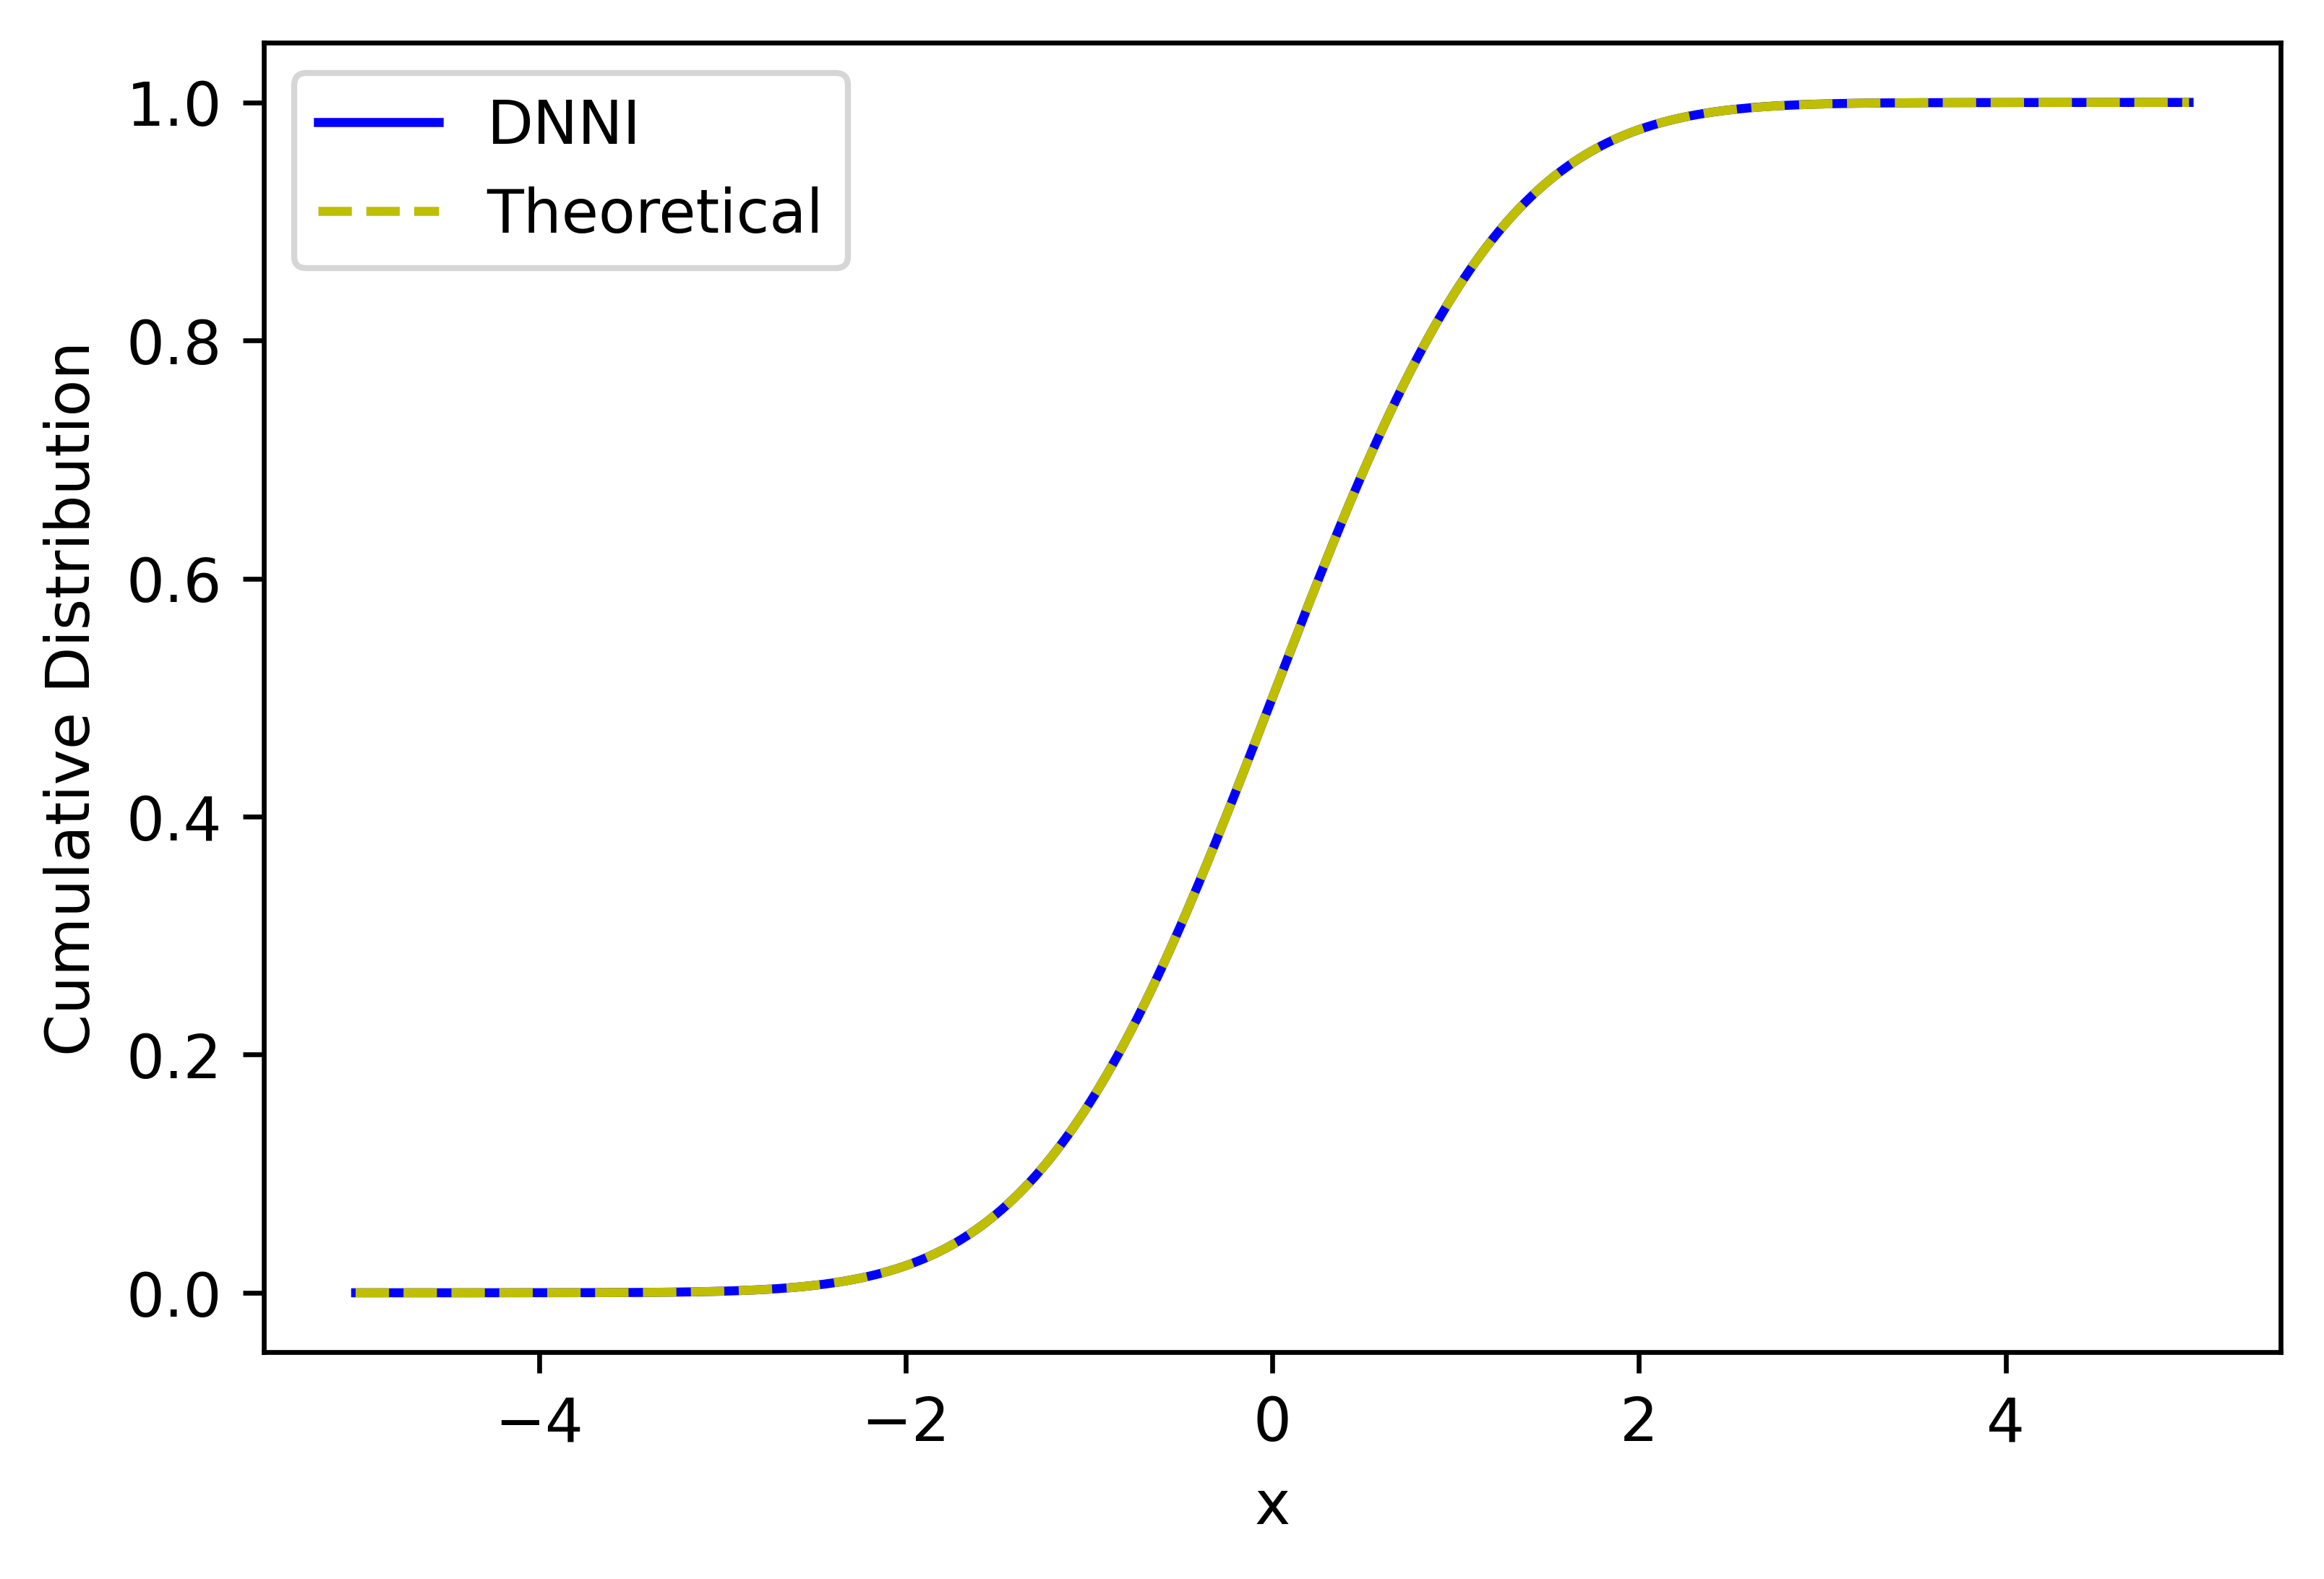

In [9]:
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(x,test_y1-test_y1[0],'b-',label='DNNI')
plt.plot(x,0.5*(1+torch.erf(x/np.sqrt(2))),'y--',label='Theoretical')
plt.ylabel('Cumulative Distribution')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/CDF normal.png',bbox_inches='tight')

# x^4 e^(-x^2/2)

In [10]:
def f2(x):
    f=1/(3*np.sqrt(2*np.pi))*torch.pow(x,4)*torch.exp(-torch.square(x)/2)
    return f

Text(0.5, 0, 'x')

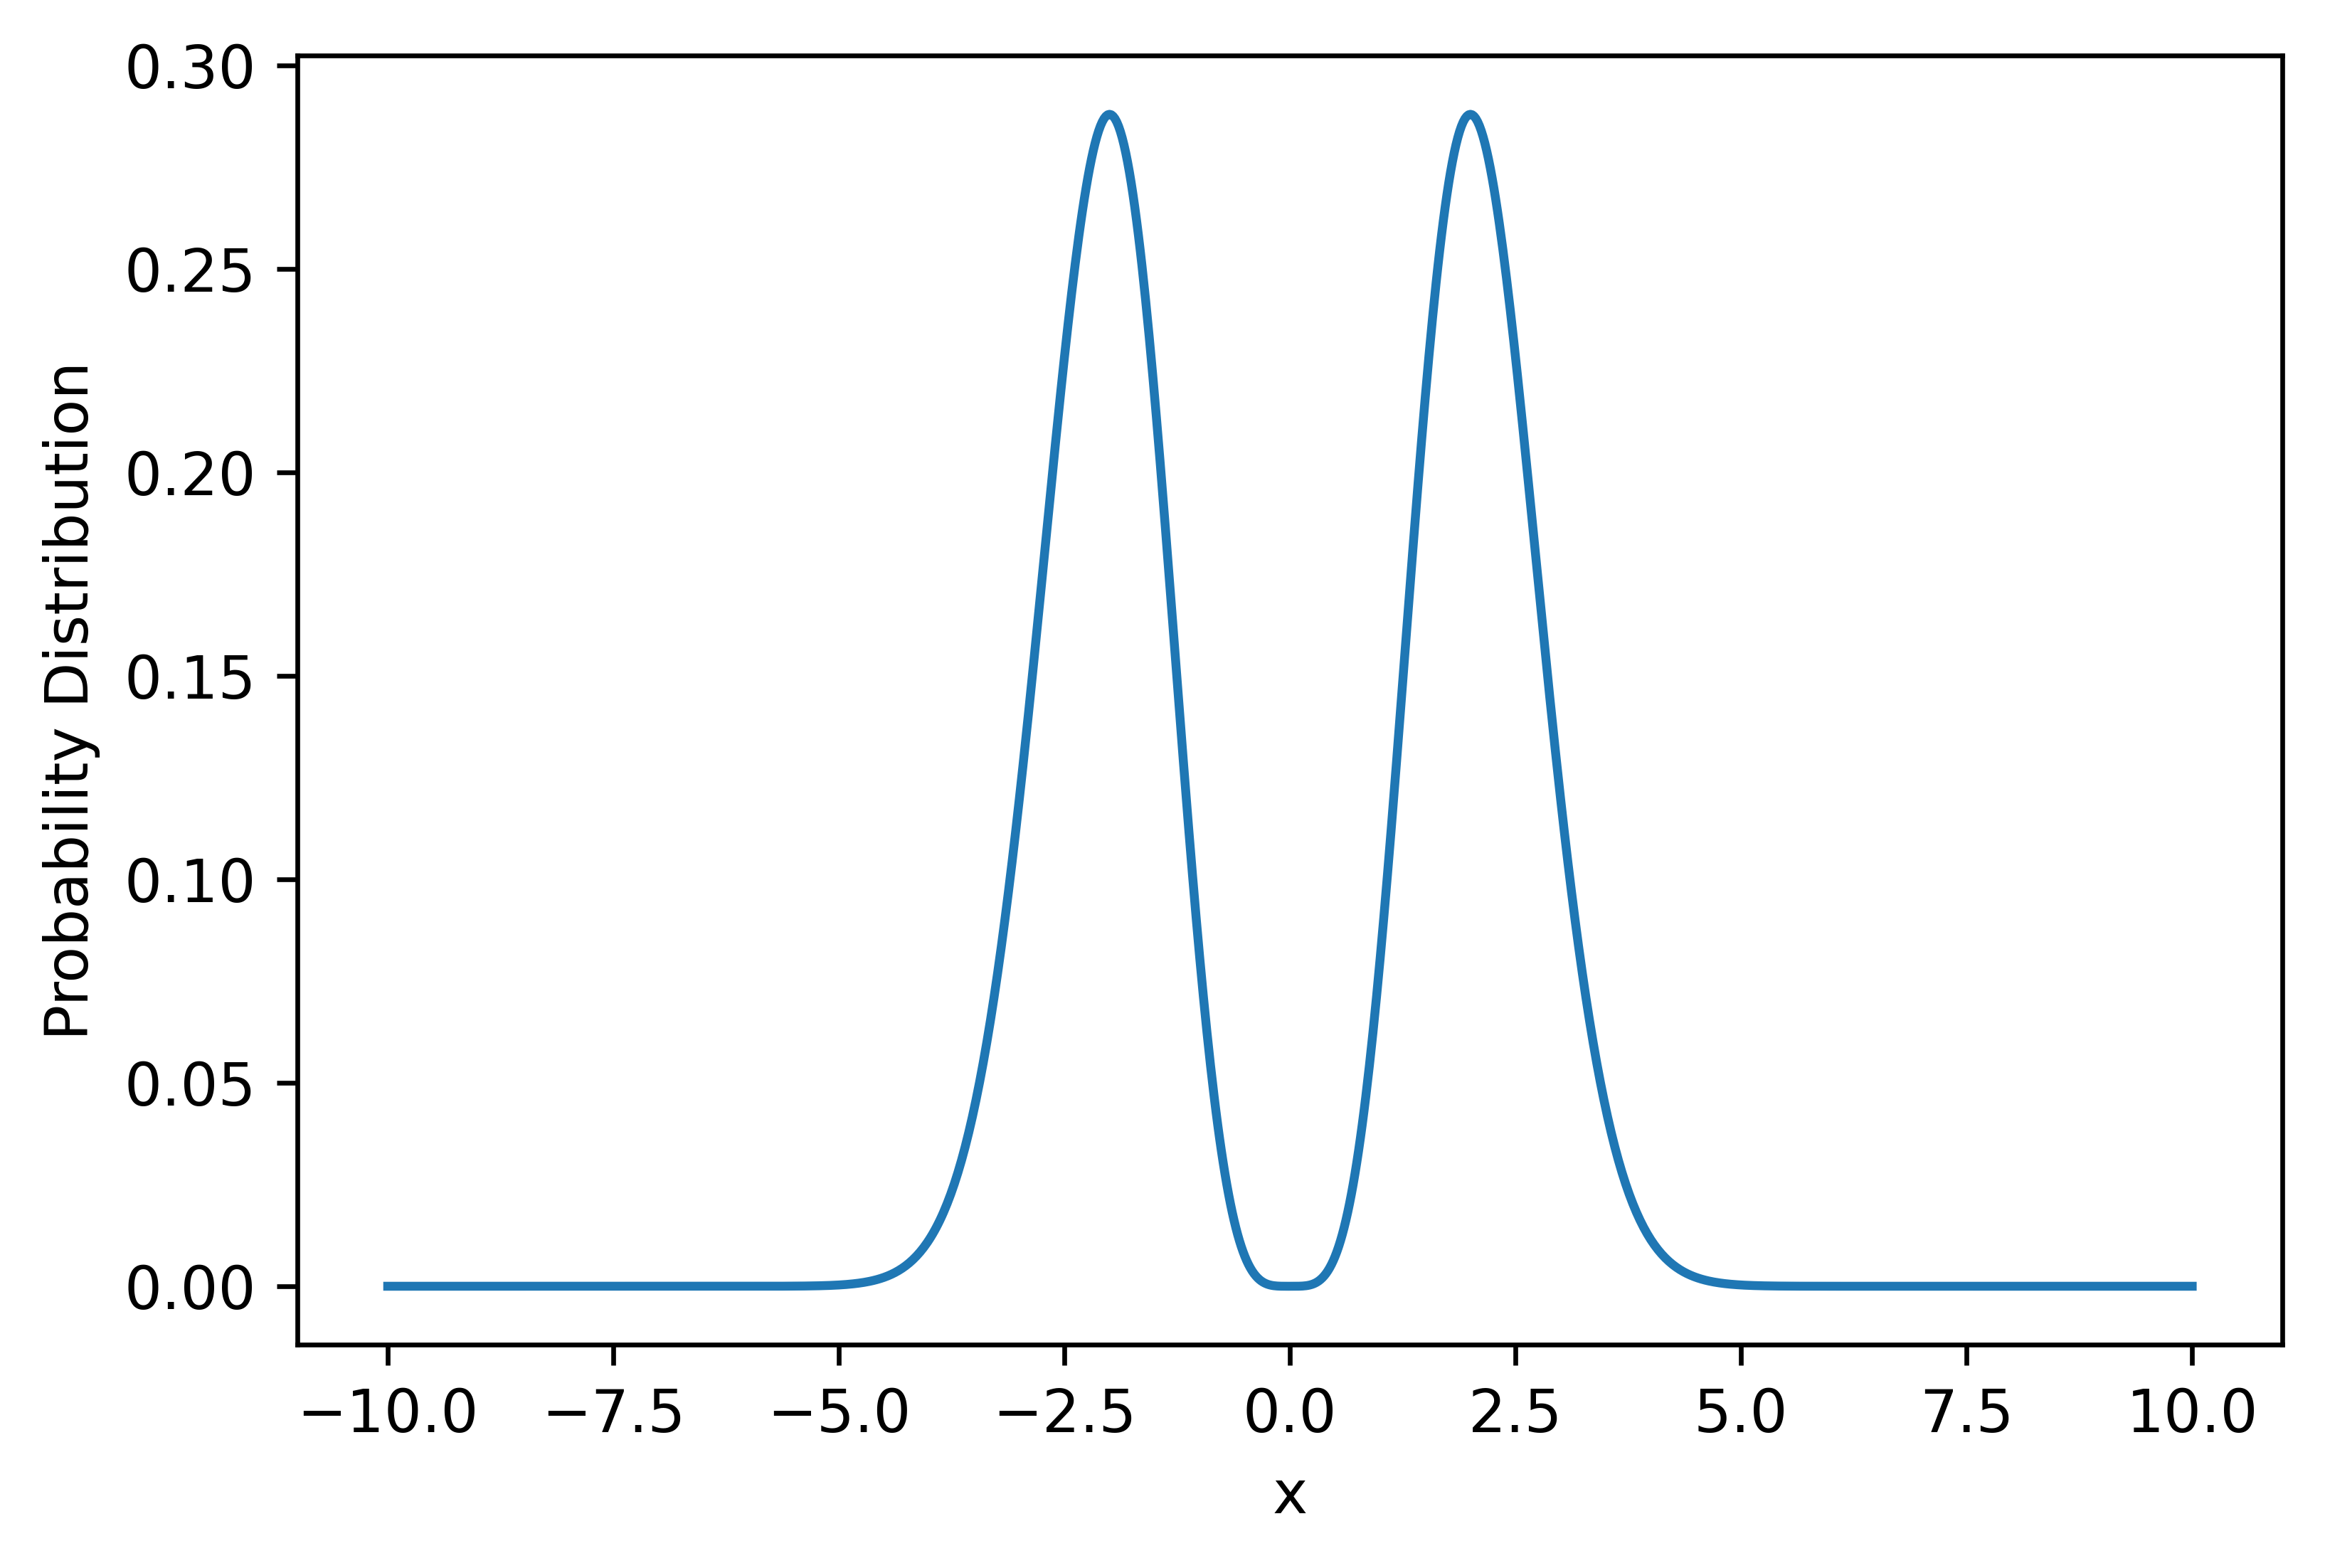

In [11]:
test_x1 = torch.linspace(-10,10,1001).view(-1,1)
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(test_x1,f2(test_x1))
plt.ylabel('Probability Distribution')
plt.xlabel('x')
#plt.savefig('images/PDF2.png',bbox_inches='tight')

In [13]:
steps=50000
x = torch.linspace(-20,20,1000).view(-1,1)
layers = np.array([1,10,10,10,1])
inn2 = DNNI.DNNI(layers,device)
inn2.to(device)
inn2.closure(steps=steps,int_f=f2,x_train=x,show=True)

  0%|▏                                                                                                                                                                  | 62/50000 [00:00<02:41, 310.04it/s]

Iter:  0 Loss:  0.008055345563070873  lr:  0.01


 25%|████████████████████████████████████████▏                                                                                                                       | 12550/50000 [00:40<01:59, 312.99it/s]

Iter:  12500 Loss:  3.2819393506907115e-07  lr:  0.002


 35%|███████████████████████████████████████████████████████▊                                                                                                        | 17446/50000 [00:56<01:44, 311.20it/s]

MSE :  9.999686404051284e-09


In [15]:
test_y2 = inn2(x[::10]).detach().cpu().numpy()
print(test_y2[-1]-test_y2[0]) #ans = 1

[0.9997562]


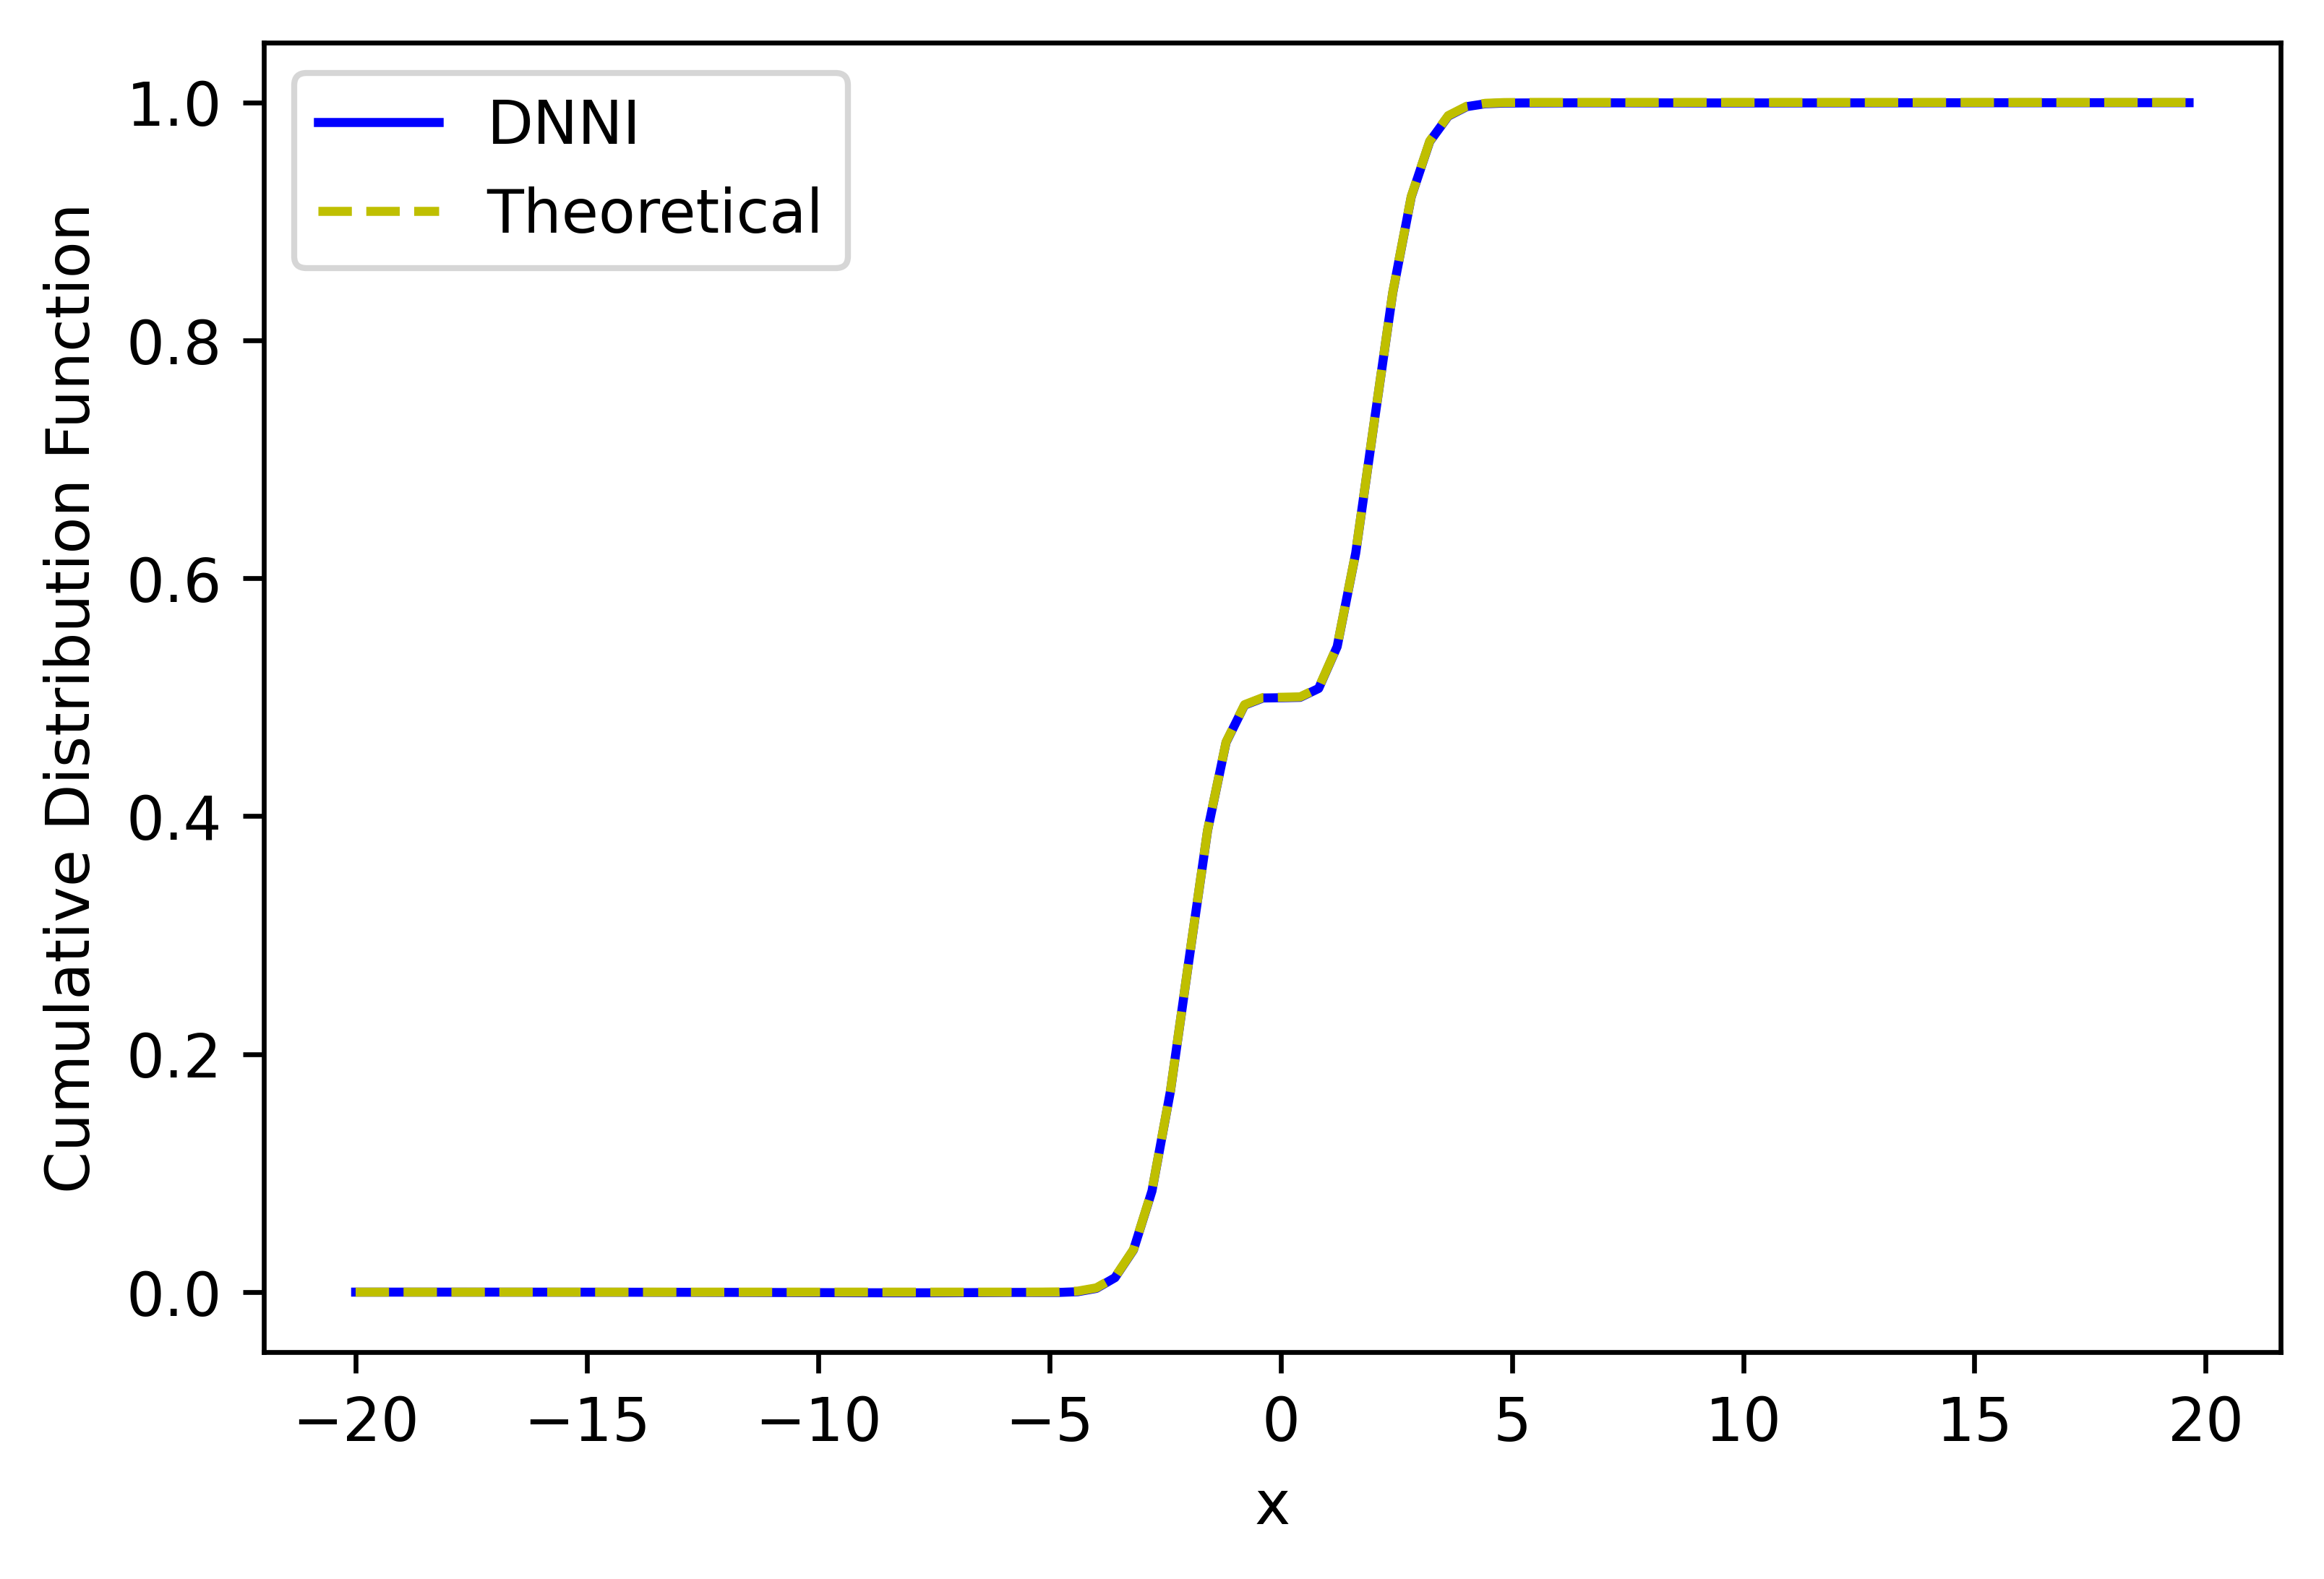

In [17]:
y_th = 0.5*(1+torch.erf(x[::10]/np.sqrt(2)))-1/(
    3*np.sqrt(2*np.pi))*x[::10]*(x[::10]**2+3)*torch.exp(-torch.square(x[::10])/2)
fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(x[::10],test_y2-test_y2[0],'b-',label='DNNI')
plt.plot(x[::10],y_th,'y--',label='Theoretical')
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('x')
plt.legend()
#plt.savefig('images/CDF2.png',bbox_inches='tight')